# [Nivell 1] -------------------------------------------------------------<h1>
Treballem els conceptes de l'estructura d'una matriu, dimensió, eixos i la vectorització que ens permet reduir l'ús de for loops en operacions aritmètiques o matemàtiques.

## - Exercici 1 - 
- Crea un np.array d'una dimensió, que inclogui l'almenys 8 nombres sencers, data type int64. Mostra la dimensió i la forma de la matriu.

In [2]:
import numpy as np
import random

one_dim = np.array([])
one_dim = one_dim.astype('int64')
for i in range(8):
    one_dim = np.append(one_dim, random.randint(1,10))

print("Array \'one_dim\':", one_dim)
print("Dimensions:", one_dim.ndim)
print("Forma:", one_dim.shape )

Array 'one_dim': [8 3 9 7 8 8 2 5]
Dimensions: 1
Forma: (8,)


## - Exercici 2 - 
- De la matriu de l'exercici 1, calcula el valor mitjà dels valors introduïts i resta la mitjana resultant de cada un dels valors de la matriu.

In [46]:
mitjana = sum(one_dim)/len(one_dim)
resta = one_dim - mitjana
resta = resta.astype('int64')
print("Valor mitja:", mitjana)
print("Mitja restada (en int64):", resta)

Valor mitja: 5.875
Mitja restada (en int64): [ 3 -3  1  1  2  1 -3  0]


## - Exercici 3 - 
- Crea una matriu bidimensional amb una forma de 5 x 5. Extreu el valor màxim de la matriu, i els valors màxims de cadascun dels seus eixos.

In [201]:
cinc = np.random.randint(1, high=10, size=(5,5))
print(cinc)

print("\nValor maxim de la matriu: ", np.max(cinc))
print("Valors maxims de cada matriu:")
x = 1
for eix in cinc:
    print("\tEix {}:    {}".format(x, np.max(eix)))
    x+=1

[[2 2 5 7 2]
 [5 5 3 5 7]
 [3 2 3 9 6]
 [7 6 5 3 9]
 [7 2 6 7 6]]

Valor maxim de la matriu:  9
Valors maxims de cada matriu:
	Eix 1:    7
	Eix 2:    7
	Eix 3:    9
	Eix 4:    9
	Eix 5:    7


# [Nivell 2] ------------------------------------------------------------- <h1>
Treballem els conceptes de l'estructura d'una matriu, Broadcasting, indexació, Mask..

## - Exercici 4 -
- Mostreu-me amb exemples de diferents matrius, la regla fonamental de Broadcasting que diu : "les matrius es poden transmetre / broadcast si les seves dimensions coincideixen o si una de les matrius té una mida d'1".

In [3]:
# EXEMPLE 1
# Arrays amb el mateix shape (3x2)

x = np.array([[1,2],
              [3,4],
              [5,6]])
y = np.array([[5,6],
              [7,8],
              [9,10]])

print("Shape array X: " , x.shape)
print("Shape array Y: " , y.shape, "\n")
print("X * Y = ", "\n", x*y)

Shape array X:  (3, 2)
Shape array Y:  (3, 2) 

X * Y =  
 [[ 5 12]
 [21 32]
 [45 60]]


In [4]:
# EXEMPLE 2
# Arrays amb diferent shape pero una de les matrius te mida 1:

x = np.array([[1,2],
              [3,4],
              [5,6]])
y = np.array([5])

print("Shape array X: " , x.shape)
print("Shape array Y: " , y.shape, "\n")
print("X * Y = ", "\n", x*y, "\n")
print("- Fent la array Y mes gran pero mantenint dimensio 1:\n")

x = np.array([[1,2],
              [3,4],
              [5,6]])
y = np.array([[5],
              [5],
              [5]])

print("Shape array X: " , x.shape)
print("Shape array Y: " , y.shape, "\n")
print("X * Y = ", "\n", x*y, "\n")

print("- Invertint l'ordre de les dimensions segueix sent el mateix:\n")
x = np.array([[1,2,3],
              [4,5,6]])
y = np.array([5,5,5])

print("Shape array X: " , x.shape)
print("Shape array Y: " , y.shape, "    (que es el mateix que (1,3))" ,"\n")
print("X * Y = ", "\n", x*y)

Shape array X:  (3, 2)
Shape array Y:  (1,) 

X * Y =  
 [[ 5 10]
 [15 20]
 [25 30]] 

- Fent la array Y mes gran pero mantenint dimensio 1:

Shape array X:  (3, 2)
Shape array Y:  (3, 1) 

X * Y =  
 [[ 5 10]
 [15 20]
 [25 30]] 

- Invertint l'ordre de les dimensions segueix sent el mateix:

Shape array X:  (2, 3)
Shape array Y:  (3,)     (que es el mateix que (1,3)) 

X * Y =  
 [[ 5 10 15]
 [20 25 30]]


In [5]:
# EXEMPLE 3
# Arrays amb diferent shape, ninguna matriu te mida 1 pero les matrius coincideixen en numero d'eixos, o nomes hi ha 1 eix:

x = np.array([[[1],[1],[1]],
              [[2],[2],[2]]])
y = np.array([[[1,2,3,4,5],
               [1,2,3,4,5],
               [1,2,3,4,5]]])
z = np.array([[[1,2,3,4,5]],
             [[1,2,3,4,5]]])


print("Shape array X: " , x.shape)
print("Shape array Y: " , y.shape)
print("Shape array Z: " , z.shape, "\n")
print("X * Y * Z = ", "\n", x*y*z)

Shape array X:  (2, 3, 1)
Shape array Y:  (1, 3, 5)
Shape array Z:  (2, 1, 5) 

X * Y * Z =  
 [[[ 1  4  9 16 25]
  [ 1  4  9 16 25]
  [ 1  4  9 16 25]]

 [[ 2  8 18 32 50]
  [ 2  8 18 32 50]
  [ 2  8 18 32 50]]]


###### Per tant com veiem, per poder fer operacions entre varies matrius _(broadcasting)_  els eixos han de coincidir en numero amb la unica excepcio que l'eix sigui 1, el qual no es detectara com un error. Llavors, el que hem de pretendre es fer coincidir el eixos iguals i/o amb valor 1. <h6>
Una funcio util per fer-ho es _np.reshape()_, la qual ens permet capgirar l'orientacio d'una matriu per veure si aixi podem fer-la coincidir amb l'altra que volem fer l'operacio. Utilitzant l'exemple anterior, suposem que la matriu Z esta orientada diferent:

In [10]:
z = np.array([[[1,2,3,4,5],[1,2,3,4,5]]])

print("Shape array X: " , x.shape)
print("Shape array Y: " , y.shape)
print("Shape array Z: " , z.shape, "\n")
print("X * Y * Z = ", "\n", x*y*z)

Shape array X:  (2, 3, 1)
Shape array Y:  (1, 3, 5)
Shape array Z:  (1, 2, 5) 



ValueError: operands could not be broadcast together with shapes (2,3,5) (1,2,5) 

Dona error perque no cumpleix la regla de _Broadcasting_, el segon eix no pot fer coincidir 3 (X) 2 (Y) i 2 (Z). Mirem, doncs, d'utilitzar _np.reshape(2,1,5)_ tornant a tenir la matriu Z com al exemple anterior, fent aixi coincidir el segon eix:

In [208]:
z = z.reshape(2,1,5)
print("Shape array X: " , x.shape)
print("Shape array Y: " , y.shape)
print("Shape array Z: " , z.shape, "\n")
xyz=x*y*z
print("X * Y * Z = ", "\n", xyz)

Shape array X:  (2, 3, 1)
Shape array Y:  (1, 3, 5)
Shape array Z:  (2, 1, 5) 

X * Y * Z =  
 [[[ 1  4  9 16 25]
  [ 1  4  9 16 25]
  [ 1  4  9 16 25]]

 [[ 2  8 18 32 50]
  [ 2  8 18 32 50]
  [ 2  8 18 32 50]]]


Fet! Es cumpleix que tots els eixos coincideixen en numero i/o hi ha un 1.

## - Exercici 5 - 
- Utilitza la Indexació per extreure els valors d'una columna i una fila de la matriu. I suma els seus valors.

In [1]:
mat = np.random.randint(10,size=(5,5))
print(mat)
print("Shape: ", mat.shape, "\n")
print("Valors columna 2:", mat[:,1])
print("Valors fila 3: \t", mat[2,:])
print("Suma d'ambdues: ", mat[:,1]+mat[2,:])

NameError: name 'np' is not defined

## - Exercici 6 -
- Mask la matriu anterior, realitzeu un càlcul booleà vectoritzat, agafant cada element i comprovant si es divideix uniformement per quatre.
Això retorna una matriu de mask de la mateixa forma amb els resultats elementals del càlcul.

In [276]:
q = (mat%4==0)
print("Matriu original: \n", mat, "\n")
print("Calcul boolea vectoritzat (divisible per 4?): \n", q, "\n")

Matriu original: 
 [[5 7 9 6 6]
 [2 1 6 9 4]
 [2 5 9 7 5]
 [9 7 5 9 3]
 [6 7 5 9 0]] 

Calcul boolea vectoritzat (divisible per 4?): 
 [[False False False False False]
 [False False False False  True]
 [False False False False False]
 [False False False False False]
 [False False False False  True]] 



## - Exercici 7 - 
A continuació, utilitzeu aquesta màscara per indexar a la matriu de números original. Això fa que la matriu perdi la seva forma original, reduint-la a una dimensió, però encara obteniu les dades que esteu cercant.

In [295]:
print("Matriu mask: \n", np.array(mat[q]))

Matriu mask: 
 [4 0]


# [Nivell 3] ---------------------------------- <h1>
Manipulació d’imatges amb Matplotlib.

## - Exercici 8 - 
- Carregareu qualsevol imatge (jpg, png ..) amb Matplotlib. (Importeu, **import matplotlib.image as mpimg**; estudieu el metode **mpimg.imread()**)
    
    Adoneu-vos que les imatges RGB (Red, Green, Blue) són realment només amplades × alçades × 3 matrius (tres canals Vermell, Verd i Blau), una per cada color de nombres enters int8. 

[[[177 158 128]
  [174 155 125]
  [176 156 129]
  ...
  [182 163 133]
  [181 161 134]
  [182 162 135]]

 [[175 156 126]
  [175 155 128]
  [175 155 128]
  ...
  [181 162 132]
  [184 164 137]
  [182 162 135]]

 [[179 160 130]
  [174 154 127]
  [174 154 127]
  ...
  [182 163 133]
  [186 166 139]
  [184 164 137]]

 ...

 [[ 83  63  10]
  [ 79  59   9]
  [ 74  53   8]
  ...
  [ 75  38   0]
  [ 31  13   0]
  [ 31  17   4]]

 [[ 80  59   4]
  [ 78  58   7]
  [ 76  55   8]
  ...
  [104  54   1]
  [ 67  33   5]
  [ 58  36  22]]

 [[ 94  74  15]
  [ 88  69  13]
  [ 97  80  28]
  ...
  [104  48   0]
  [ 79  33   0]
  [ 94  61  42]]]

- SHAPE:
 (1600, 2560, 3)


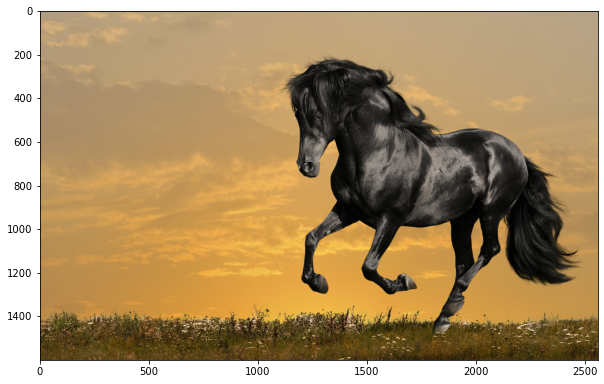

In [104]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_data = mpimg.imread("Desktop/horsey.jpg")
print(img_data)  #si treiem del comentari mostrara la np.array() amb les propietats de la imatge.
print("\n- SHAPE:\n", np.shape(img_data))

plt.figure(figsize=(10,7))
plt.imshow(img_data)
#plt.axis('off') metode per eliminar les axis


- Mostreu-me a veure què passa quan eliminem el canal G Verd o B Blau. Hauries d'utilitzar la indexació per seleccionar el canal que voleu anul·lar.

In [94]:
red = img_data[:,:,0]
green = img_data[:,:,1]
blue  = img_data[:,:,2]

green = green*0     #en tots els pixels posem canal Verd "0" per eliminarlo.

img2 = np.array([red, green, blue])   #sempre ordena els valors com si fos un set, per tant queda BGR enlloc de RGB
img2.shape

(3, 1600, 2560)

In [95]:
img2 = np.swapaxes(img2, 0, 1)
img2 = np.swapaxes(img2, 1, 2)        #fem dos "np.swapaxes" i ja tenim ordenat en format RGB
img2.shape

(1600, 2560, 3)

Text(0.5, 1.0, 'Amended Image in RGB')

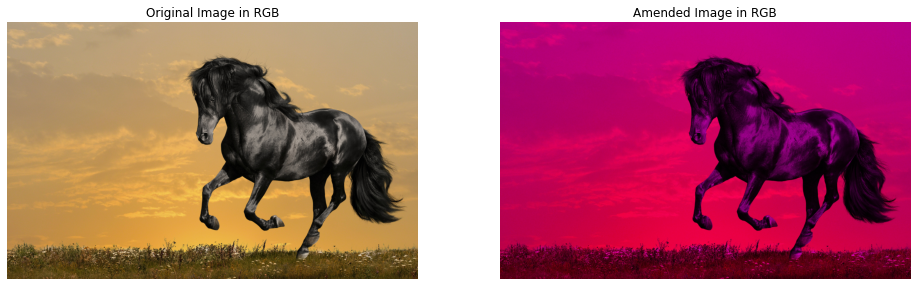

In [111]:
plt.figure(figsize=(25,20))
plt.subplot(231)
plt.imshow(img_data)
plt.axis('off')
plt.title('Original Image in RGB')

plt.subplot(232)
plt.imshow(img2)
plt.axis('off')
plt.title('Amended Image in RGB')

- Manipuleu aquests bytes i torneu a utilitzar Matplotlib per desar la imatge modificada un cop hàgiu acabat. (Utilitzar el mètode, **mpimg.imsave()** de la llibreria importada, per guardar les imatges modificades i que haureu de pujar al vostre repositori a github.)

In [112]:
mpimg.imsave("Desktop/horsey2.jpg", img2)